# Homework 10
## Clustering
### Ali Asghar Yousuf
### ay06993@st.habib.edu.pk

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler

In [15]:
file_name = 'McDonaldsMenu.csv'
df = pd.read_csv(file_name)
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### Q1
Clean the data


In [16]:
df = df.replace('?', np.NaN)
df = df.dropna()
df.drop(['Category', 'Item'], axis=1, inplace=True)

df.head()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,...,31,10,4,17,3,17,10,0,25,15
1,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,...,30,10,4,17,3,18,6,0,25,8
2,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,...,29,10,4,17,2,14,8,0,25,10
3,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,...,30,10,4,17,2,21,15,0,30,15
4,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,...,30,10,4,17,2,21,6,0,25,10


### Q2

Drop Serving Size column


In [17]:
X = df.drop(['Serving Size'], axis=1)
X.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


### Q3

Normalize the data

In [18]:
scaler = MinMaxScaler()
Scaled = scaler.fit_transform(X)
Scaled[1:5]

array([[0.13297872, 0.06603774, 0.06779661, 0.06593407, 0.15      ,
        0.14705882, 0.        , 0.04347826, 0.04166667, 0.21388889,
        0.21333333, 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.0234375 , 0.20689655, 0.03529412, 0.        , 0.35714286,
        0.2       ],
       [0.19680851, 0.18867925, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.07826087, 0.078125  , 0.21666667,
        0.22      , 0.20567376, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.16091954, 0.04705882, 0.        , 0.35714286,
        0.25      ],
       [0.2393617 , 0.23584906, 0.23728814, 0.23626374, 0.5       ,
        0.50980392, 0.        , 0.49565217, 0.49479167, 0.23888889,
        0.24      , 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.24137931, 0.08823529, 0.        , 0.42857143,
        0.375     ],
       [0.21276596, 0.19811321, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.08695652, 0.0833333

### Q4

Knee plot to find the best K

In [19]:
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=99, n_init=10)
    kmeans.fit(Scaled)
    wss.append(kmeans.inertia_)

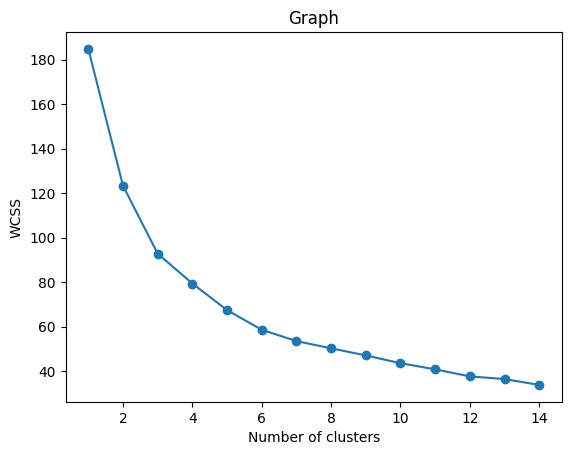

In [20]:
plt.plot(range(1, 15), wss, marker='o')
plt.title('Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

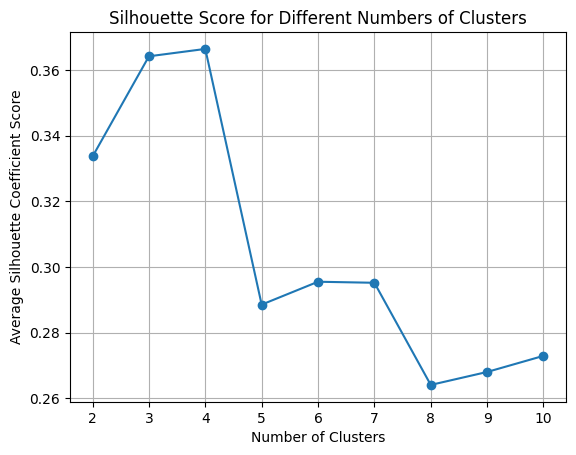

In [21]:
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, max_iter=300, random_state=99, n_init=10).fit(Scaled)
    score = silhouette_score(Scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')  # Added marker for better visualization
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Coefficient Score')
plt.grid(True) 
plt.show()

#### Analysis

The WSS plot does not have a clear elbow, the rate of change of WSS is not very high at any point. However, Silhouette score has a peak at K=3 and K=4 and then it starts to decrease. So, we can say that K=3 or K=4 is the best K for this dataset.

### Q5

K-means clustering

In [22]:
kmeans = KMeans(n_clusters = 5, max_iter = 300, random_state = 99, n_init=10)
Y = kmeans.fit_predict(Scaled)

### Q6

Visualize the clusters

Text(0.5, 1.0, 'The actual dataset')

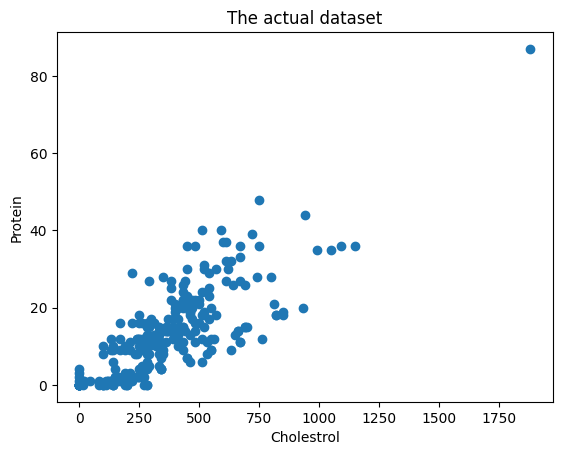

In [23]:
plt.scatter(x=X['Calories'],y=X['Protein'])
plt.xlabel('Cholestrol')
plt.ylabel('Protein')
plt.title("The actual dataset")

Text(0.5, 1.0, 'Datasets in Clusters')

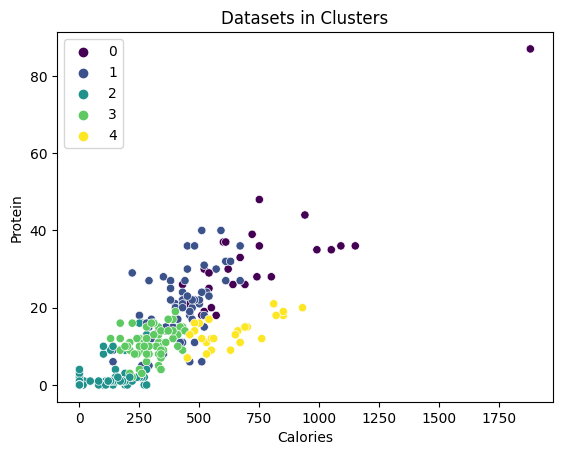

In [24]:
# color2=np.array(['magenta','red','blue', 'purple', 'green'])
# plt.scatter(x=X['Calories'],y=X['Protein'], c='viridis')
sns.scatterplot(x='Calories', y='Protein', data=X, hue=Y, palette='viridis')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title("Datasets in Clusters")

### Q7

Cluster specific data frames

In [25]:
C0 = X.iloc[Y == 0, :]
C1 = X.iloc[Y == 1, :]
C2 = X.iloc[Y == 2, :]
C3 = X.iloc[Y == 3, :]
C4 = X.iloc[Y == 4, :]

### Q8

Interpret the clusters

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,732.592593,368.518519,41.000000,63.222222,14.222222,71.185185,0.574074,233.148148,77.740741,1581.851852,...,59.185185,19.777778,3.703704,14.703704,7.888889,32.074074,9.592593,6.481481,20.814815,23.888889
std,304.651031,167.531942,18.652696,28.725938,3.178453,15.930225,0.742963,166.907092,55.685651,557.191012,...,27.910623,9.299848,1.462738,5.947299,5.931230,13.575787,5.839252,7.622691,8.161999,7.885397
min,430.000000,210.000000,23.000000,36.000000,9.000000,46.000000,0.000000,35.000000,12.000000,860.000000,...,30.000000,10.000000,2.000000,6.000000,0.000000,18.000000,0.000000,0.000000,4.000000,10.000000
25%,540.000000,275.000000,30.500000,47.500000,12.000000,61.000000,0.000000,100.000000,32.500000,1280.000000,...,42.000000,14.000000,3.000000,11.000000,3.000000,25.500000,6.000000,2.000000,15.000000,17.500000
50%,640.000000,330.000000,37.000000,57.000000,14.000000,69.000000,0.000000,250.000000,83.000000,1470.000000,...,50.000000,17.000000,3.000000,12.000000,7.000000,30.000000,10.000000,2.000000,25.000000,25.000000
75%,775.000000,420.000000,47.000000,71.500000,16.000000,79.500000,1.250000,282.500000,94.000000,1710.000000,...,58.000000,19.500000,4.000000,17.000000,13.000000,36.000000,15.000000,8.000000,27.500000,30.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,2.500000,575.000000,192.000000,3600.000000,...,118.000000,39.000000,7.000000,28.000000,18.000000,87.000000,20.000000,25.000000,30.000000,40.000000


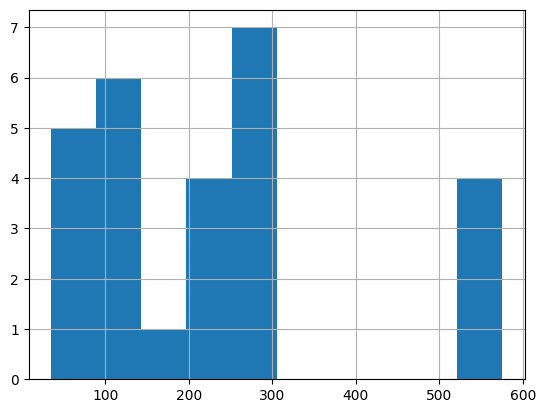

In [26]:
C0['Cholesterol'].hist()
C0.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.00000,66.000000
mean,421.969697,176.893939,19.643939,30.227273,6.537879,32.772727,0.136364,58.106061,19.378788,953.863636,...,41.560606,13.818182,2.924242,11.727273,8.000000,19.984848,23.939394,14.454545,15.19697,14.606061
std,113.871989,66.005624,7.385935,11.386626,3.053763,15.424053,0.310650,44.727940,15.017697,372.392262,...,12.530736,4.161764,1.304555,5.370992,6.139406,8.953714,44.380134,24.315352,7.06066,4.803456
min,140.000000,35.000000,4.000000,6.000000,1.500000,8.000000,0.000000,0.000000,0.000000,115.000000,...,8.000000,3.000000,1.000000,5.000000,0.000000,2.000000,0.000000,0.000000,2.00000,4.000000
25%,352.500000,132.500000,15.000000,23.250000,4.125000,20.500000,0.000000,35.000000,11.000000,762.500000,...,34.000000,11.000000,2.000000,7.000000,3.250000,14.000000,2.000000,0.500000,10.00000,10.000000
50%,430.000000,185.000000,20.500000,32.000000,7.000000,33.500000,0.000000,50.000000,16.500000,985.000000,...,42.000000,14.000000,3.000000,11.000000,7.000000,20.000000,4.000000,8.000000,15.00000,15.000000
75%,495.000000,220.000000,24.000000,37.750000,9.000000,44.000000,0.000000,78.750000,25.750000,1257.500000,...,47.750000,16.000000,3.000000,14.000000,11.000000,26.500000,10.000000,20.000000,20.00000,20.000000
max,670.000000,300.000000,33.000000,51.000000,13.000000,65.000000,1.000000,260.000000,87.000000,1560.000000,...,68.000000,23.000000,7.000000,28.000000,32.000000,40.000000,170.000000,130.000000,30.00000,25.000000


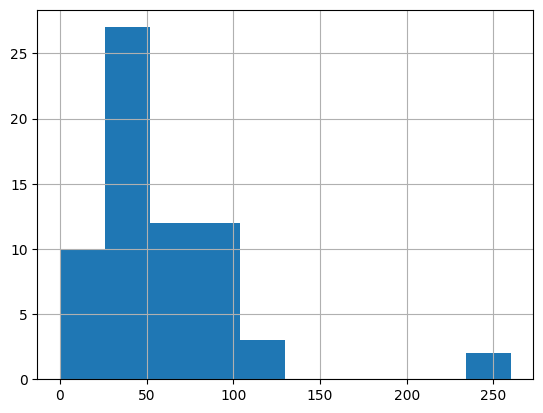

In [27]:
C1['Cholesterol'].hist()
C1.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,129.285714,25.500000,2.885714,4.471429,1.371429,6.757143,0.0,8.785714,3.071429,85.571429,...,24.442857,8.142857,0.257143,1.028571,20.414286,2.300000,2.871429,13.014286,4.000000,1.157143
std,92.588719,36.536164,4.114460,6.335365,1.975733,9.707961,0.0,13.281667,4.559816,142.502334,...,20.253206,6.780803,0.501757,2.126243,21.165663,3.823459,6.732834,42.776633,7.190977,2.887433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,10.000000,...,4.750000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,42.500000,...,23.000000,8.000000,0.000000,0.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,190.000000,57.500000,6.750000,10.500000,3.000000,15.000000,0.0,15.000000,6.000000,87.500000,...,36.750000,12.000000,0.000000,0.000000,35.750000,2.000000,4.000000,0.000000,4.000000,0.000000
max,280.000000,160.000000,18.000000,27.000000,6.000000,29.000000,0.0,45.000000,14.000000,700.000000,...,76.000000,25.000000,2.000000,10.000000,76.000000,16.000000,45.000000,240.000000,30.000000,15.000000


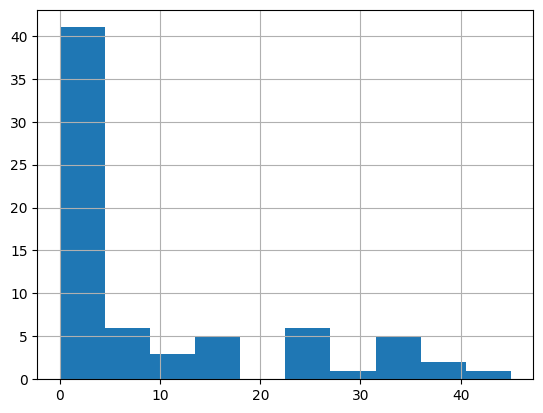

In [28]:
C2['Cholesterol'].hist()
C2.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,299.552239,56.641791,6.425373,9.865672,3.753731,18.522388,0.014925,21.641791,7.373134,155.149254,...,50.044776,16.716418,1.313433,5.19403,44.343284,10.686567,12.552239,2.671642,33.925373,2.716418
std,73.925287,47.068519,5.272322,8.063941,3.162725,15.421707,0.085730,12.979823,4.498605,54.640493,...,14.466715,4.832986,0.891185,3.52153,14.894124,3.858124,7.752387,8.917786,12.912659,2.429652
min,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,40.000000,...,15.000000,5.000000,0.000000,0.00000,12.000000,2.000000,0.000000,0.000000,6.000000,0.000000
25%,250.000000,7.500000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,3.000000,122.500000,...,40.500000,13.500000,1.000000,3.00000,38.000000,9.000000,10.000000,0.000000,30.000000,0.000000
50%,300.000000,45.000000,5.000000,8.000000,3.500000,17.000000,0.000000,20.000000,7.000000,150.000000,...,50.000000,17.000000,1.000000,4.00000,45.000000,11.000000,10.000000,0.000000,35.000000,2.000000
75%,340.000000,100.000000,11.000000,17.000000,7.000000,33.000000,0.000000,30.000000,11.000000,185.000000,...,60.500000,20.000000,1.000000,6.00000,56.000000,13.500000,15.000000,0.000000,42.500000,4.000000
max,440.000000,150.000000,16.000000,25.000000,10.000000,48.000000,0.500000,50.000000,16.000000,280.000000,...,79.000000,26.000000,5.000000,19.00000,72.000000,19.000000,50.000000,45.000000,60.000000,8.000000


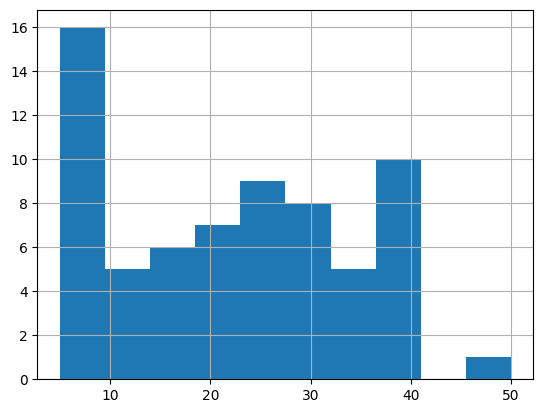

In [29]:
C3['Cholesterol'].hist()
C3.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000
mean,633.333333,194.666667,21.566667,33.200000,13.300000,66.400000,0.916667,69.666667,23.166667,228.166667,...,96.833333,32.233333,0.833333,3.566667,83.633333,13.533333,20.333333,0.0,44.500000,4.633333
std,137.422915,43.369569,4.868501,7.503562,2.972866,15.359149,0.265334,15.365284,5.017784,72.747595,...,24.554069,8.186125,0.746640,3.158823,20.801995,3.830309,5.241304,0.0,13.477312,3.986904
min,450.000000,140.000000,15.000000,24.000000,9.000000,44.000000,0.500000,45.000000,14.000000,125.000000,...,64.000000,21.000000,0.000000,0.000000,57.000000,7.000000,15.000000,0.0,20.000000,0.000000
25%,530.000000,152.500000,17.250000,26.500000,10.500000,53.500000,1.000000,60.000000,20.000000,165.000000,...,76.750000,25.250000,0.000000,0.000000,64.750000,11.000000,15.000000,0.0,35.000000,0.500000
50%,640.000000,190.000000,21.000000,32.500000,12.500000,62.500000,1.000000,70.000000,23.000000,215.000000,...,93.500000,31.000000,1.000000,4.000000,81.000000,13.500000,20.000000,0.0,42.500000,4.000000
75%,697.500000,210.000000,23.000000,35.750000,15.000000,73.750000,1.000000,80.000000,26.750000,260.000000,...,113.250000,37.750000,1.000000,5.000000,98.500000,16.000000,25.000000,0.0,50.000000,8.000000
max,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.500000,95.000000,32.000000,400.000000,...,141.000000,47.000000,2.000000,10.000000,128.000000,21.000000,30.000000,0.0,70.000000,15.000000


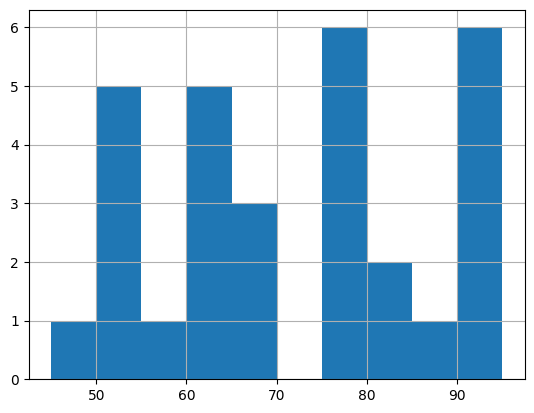

In [30]:
C4['Cholesterol'].hist()
C4.describe()

#### Analysis

1. While cluster C3 is second highest cluster in cholestrol level, the mean of the sugar is only 10.8 which is less than the mean of sugar in cluster C2 and cluster C3. 
2. The cholestrol level again is unbalanced and is not increased linearly, and what I mean by that is average of cholestrols do not increase as the cluster level increases. 
3. The cholestrol mean is again imbalanced and does not increase linearly, the highest mean of cholestrol is in cluster C3. 

### Q9

Unique Naming

C:\Users\ali\AppData\Local\Temp\ipykernel_7600\393677473.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_clusters)


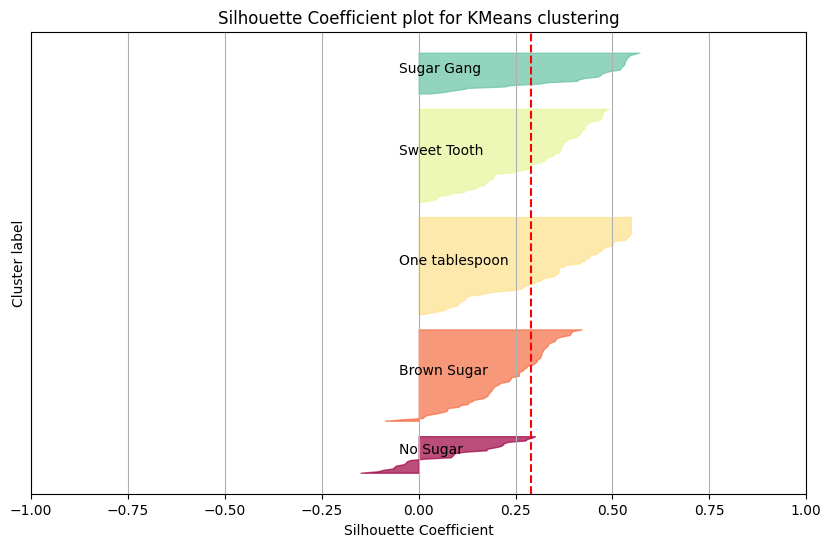

In [31]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, max_iter=300, random_state=99, n_init=10).fit(Scaled)
silhouette_scores = silhouette_samples(Scaled, kmeans.labels_)
avg_silhouette_score = silhouette_score(Scaled, kmeans.labels_)

cluster_names = {
    0: 'No Sugar',
    1: 'Brown Sugar',
    2: 'One tablespoon',
    3: 'Sweet Tooth',
    4: 'Sugar Gang'
}

fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(n_clusters):
    cluster_silhouette_scores = silhouette_scores[kmeans.labels_ == i]
    cluster_silhouette_scores.sort()
    cluster_size = cluster_silhouette_scores.shape[0]
    y_upper = y_lower + cluster_size
    color = plt.cm.get_cmap('Spectral')(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_scores,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, cluster_names[i])  # Use cluster names here
    y_lower = y_upper + 10
    

ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster label')
ax.axvline(x=avg_silhouette_score, color='red', linestyle='--')
ax.set_yticks([])
ax.set_xlim([-1, 1])
plt.title('Silhouette Coefficient plot for KMeans clustering')
plt.grid()
plt.show()